In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Introduction of Digits datasets

In [2]:
digits = datasets.load_digits()  # Handwritten numeral recognition data
# It includes 1797 samples which have a image(8*8) and a label([0,9])

In [3]:
digits.keys()  # view properties

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [4]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'target_names': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 'images': array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
         [ 0.,  0., 13., ..., 15.,  5.,  0.],
         [ 0.,  3., 15., ..., 11.,  8.,  0.],
         ...,
         [ 0.,  4., 11., ..., 12.,  7.,  0.],
         [ 0.,  2., 14., ..., 12.,  0.,  0.],
         [ 0.,  0.,  6., ...,  0.,  0.,  0.]],
 
        [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
         [ 0.,  0.,  0., ...,  9.,  0.,  0.],
         [ 0.,  0.,  3., ...,  6.,  0.,  0.],
         ...,
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  0., ..., 10.,  0.,  0.]],
 
        [[ 0

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


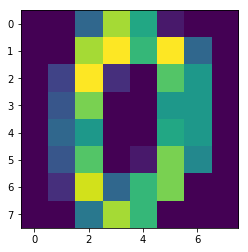

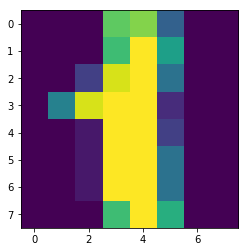

In [25]:
print(digits.images[0])  # images data saves image(8*8) and the data type is float64
plt.imshow(digits.images[0])
plt.figure()
plt.imshow(digits.images[1])

In [6]:
digits.data[0] # it justs makes the datas of image(8*8 array) to 1*64 array.

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [7]:
digits.target # the label of everyimage

array([0, 1, 2, ..., 8, 9, 8])

In [8]:
digits.target_names # the all labels of the datasets

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [9]:
digits.DESCR # the origin of datasets

"Optical Recognition of Handwritten Digits Data Set\n===================================================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 5620\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttp://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of on pixels are counted 

### Features selection

In [10]:
# In a image data,we usually make the every pixel points of imgaes as the features.The we choose the data(64*1 array).
print(digits.data.shape,digits.images.shape)

(1797, 64) (1797, 8, 8)


### Data cleaning

In [11]:
# It is impossible for people to write a number in a 8*8 pixels image.
# When we collect the datas,we will let people write in 200*200 pixels.
# But the features will become to 40000.The calculation is lager!
# We will narrow the 200*200 to 8*8.
# This datasets are already cleanned.

### Model selection

In [12]:
# Different machine learing algorithm models have different efficiency for specific problems.
# About this datasets,we will use SVM(Spport Vector Machine).

### Model training

In [19]:
from sklearn.cross_validation import train_test_split 
Xtrain,Xtest,Ytrain,Ytest = train_test_split(digits.data,digits.target, test_size = 0.2, random_state = 0)
# split the data to train and test

In [20]:
from sklearn import svm
clf = svm.SVC(gamma=0.001, C=100.)
clf.fit(Xtrain,Ytrain)

SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

### Model test

In [21]:
clf.score(Xtest,Ytest) # the result is perfect！
Ypred = clf.predict(Xtest)

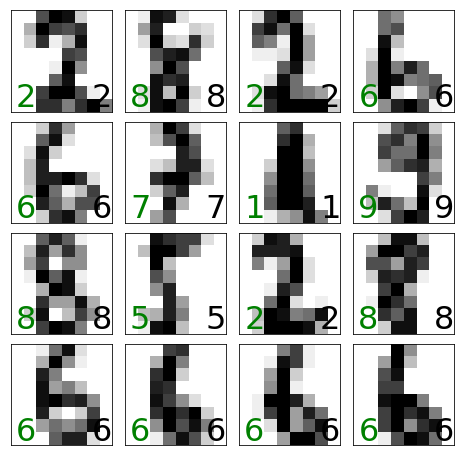

In [22]:
fig,axes = plt.subplots(4,4,figsize = (8,8))
fig.subplots_adjust(hspace = 0.1,wspace=0.1) # adjust the distence of every figure
for i,ax in enumerate(axes.flat):
    ax.imshow(Xtest[i].reshape(8,8),cmap = plt.cm.gray_r,interpolation='nearest')
    ax.text(0.05,0.05,str(Ypred[i]), fontsize = 32, transform = ax.transAxes,color = 'green' if Ypred[i] == Ytest[i] else 'red')
    ax.text(0.8,0.05,str(Ytest[i]),fontsize = 32,transform = ax.transAxes,color='black')
    ax.set_xticks(())
    ax.set_yticks(())

### Model save and load

In [23]:
from sklearn.externals import joblib
# Save
joblib.dump(clf,'digits_svm.pkl')

['digits_svm.pkl']

In [24]:
# load
clf = joblib.load('digits_svm.pkl')
Ypred = clf.predict(Xtest)
clf.score(Xtest,Ytest)

0.9916666666666667